# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 6 de octubre, 2020 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta)= \frac{1}{2m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} 2 (y^{(i)} - \beta_0 - \beta_1 x^{(i)}) * (-x^{(i)})$$

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta)= \frac{1}{m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)}) * (-x^{(i)}) = 0 $$

$$ = \frac{1}{m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (-y^{(i)}(x^{(i)}) + \beta_0(x^{(i)}) + \beta_1 x^{(2i)}) *  = 0 $$

Nota: Recordar que
$$   \hat{y} = \hat\beta_0 - \hat\beta_1 x   $$
$$   \hat\beta_0 = {y} - \hat\beta_1 x   $$ 
$$   {y}=\hat\beta_0 + \hat\beta_1 x   $$ 

 $$ = \frac{1}{m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (\hat{y}(x^{(i)}) - y(x^{(i)})*x^{(i)}_j
 $$

## Problema 2

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [36]:
edat=open("edad.dat","r") #Como no me corrió el código de la clase entonces abrí a la antigua los datos
textoedad=edat.read()
edat.close()
listaedad=textoedad.split('\n')
listaedad.pop()
datosedad=[float(n) for n in listaedad ]
print(datosedad)

[2.0658746, 2.3684087, 2.5399929, 2.5420804, 2.549079, 2.7866882, 2.9116825, 3.035627, 3.1146696, 3.1582389, 3.3275944, 3.3793165, 3.4122006, 3.4215823, 3.5315732, 3.6393002, 3.6732537, 3.9256462, 4.0498646, 4.2483348, 4.3440052, 4.3826531, 4.4230602, 4.6102443, 4.6881183, 4.9777333, 5.0359967, 5.0684536, 5.4161491, 5.4395623, 5.4563207, 5.5698458, 5.6015729, 5.6877617, 5.7215602, 5.8538914, 6.1978026, 6.3510941, 6.4797033, 6.7383791, 6.8637686, 7.0223387, 7.0782373, 7.1514232, 7.4664023, 7.5973874, 7.7440717, 7.7729662, 7.8264514, 7.9306356]


In [37]:
aldat=open("altura.dat","r")
textoaltura=aldat.read()
aldat.close()
listaltura=textoaltura.split('\n')
listaltura.pop()
datosaltura=[float(n) for n in listaltura ]
print(datosaltura)

[0.77918926, 0.91596757, 0.90538354, 0.90566138, 0.9389889, 0.9668474, 0.96436824, 0.91445939, 0.93933944, 0.96074971, 0.89837094, 0.91209739, 0.94238499, 0.96624578, 1.05265, 1.0143791, 0.95969426, 0.96853716, 1.0766065, 1.1454978, 1.0340625, 1.0070009, 0.96683648, 1.0895919, 1.0634462, 1.1237239, 1.0323374, 1.0874452, 1.0702988, 1.1606493, 1.0778037, 1.1069758, 1.0971875, 1.1648603, 1.1411796, 1.0844156, 1.1252493, 1.1168341, 1.1970789, 1.2069462, 1.1251046, 1.1235672, 1.2132829, 1.2522652, 1.2497065, 1.1799706, 1.1897299, 1.3029934, 1.2601134, 1.2562267]


In [38]:
XE=np.array(datosedad) #Vamos a trabajar con arreglos en la regresión lineal para evitar estar declarando ciclos
YA=np.array(datosaltura)

In [18]:
import matplotlib.animation as animation

In [58]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        unos = np.ones((x.shape[0], 1))
        Xt = X.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
                
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m

In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm 

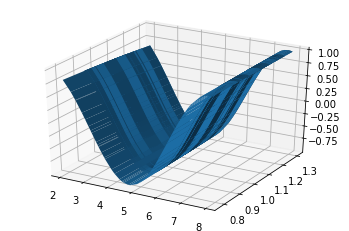

In [46]:
fig = plt.figure()
ax=gca(projection='3d')
XE,YA = np.meshgrid(XE,YA)

R=np.sqrt(XE**2+ YA**2)
Z=np.sin(R)
surface=ax.plot_surface(XE,YA,Z)

In [39]:
def plotGuess(x, y, interceptor, pendiente):
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    plt.scatter(XE,YA, label="data")
    plt.plot(XE, modelo(XE, interceptor, pendiente), label='Guess')
    plt.xlabel('Edad (yr)')
    plt.ylabel('Altura (m)')
    plt.legend(loc="best")

In [45]:
interact(plotGuess, x=fixed(XE), y=fixed(YA), interceptor=(0,1,0.02), pendiente=(0,0.2, 0.02))

interactive(children=(FloatSlider(value=0.0, description='interceptor', max=1.0, step=0.02), FloatSlider(value…

<function __main__.plotGuess(x, y, interceptor, pendiente)>

In [ ]:
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(XE, YA)

In [55]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [ ]:
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModelo, x=fixed(XE), y=fixed(YA), rl=fixed(r), iteracion=(0,ultima_iteracion,10));

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [15]:
%cat data/chirps.txt

UsageError: Line magic function `%cat` not found.


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [47]:
datos=open('chirps.txt','r') #En este apartado leeremos los datos de un txt
xdatos=[]  #Como a mí se me hace más fácil trabajar con listas entonces vamos a extraer los datos a estas listas
ydatos=[]
lineas=datos.readlines() 
for linea in lineas: #Utilizamos el ciclo for para que por cada linea del texto extraiga los valores
    x,y = linea.split() #Separamos las líneas x de la y
    xdatos.append(float(x)) #Guardamos los datos x en la lista de los datos x
    ydatos.append(float(y)) #Guardamos los datos y en la lista de los datos y 
datos.close()
print (xdatos)
print (ydatos)

[20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0, 14.4]
[88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3]


In [48]:
X=np.array(xdatos) #Vamos a trabajar con arreglos en la regresión lineal para evitar estar declarando ciclos
Y=np.array(ydatos)

Text(0, 0.5, 'Temperatura (F)')

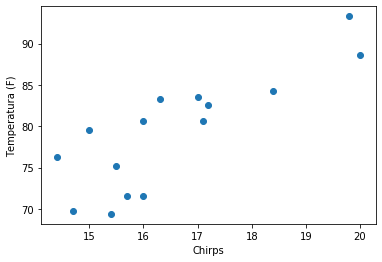

In [49]:
plt.scatter(xdatos,ydatos, label="data") #Primero vamos a ver cómo se ven nuestros datos sin la regresión
plt.xlabel('Chirps')
plt.ylabel('Temperatura (F)')

In [50]:
n=len(xdatos)
sumx=sum(X)  #Primero sumamos los datos del arreglo de X para obtener el promedio 
sumy=sum(Y) #Después sumamos los datos del arreglo de Y para igual sacar su promedio
promx=sumx/n #De aquí en adelante son puras fórmulas
promy=sumy/n 
sx2=sum((X-promx)**2)
sy2=sum((Y-promy)**2)
sxy=sum((X-promx)*(Y-promy))
b=sxy/sx2 #Para sacar la pendiente beta necesitamos sacar sxy y sx2 (arriba en este código se ve su fórmula)
a=promy-(b*promx) #Para sacar el factor beta0 necesitamos utlizar promy=beta0+beta(promx) y despejamos 

sumx2=sum(X*X)
sumy2=sum(Y*Y)
sumxy=sum(X*Y)
sigmax=np.sqrt(sumx2/n - promx**2)
sigmay=np.sqrt(sumy2/n - promy**2)
sigmaxy=sumxy/n - promx*promy
R2=(sigmaxy/(sigmax*sigmay))**2 #Sacamos R2 para entender la correlación que existen entrelos datos x & y 
print(n,b,a,R2)

15 3.410322999513067 22.848982308066844 0.6922946529147221


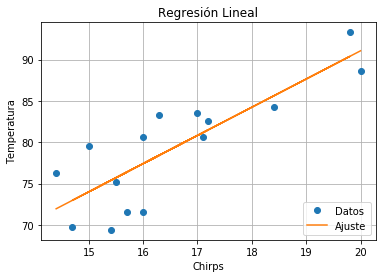

In [51]:
plt.plot(X,Y,'o', label='Datos') #Graficamos en plot los datos con forma de puntos
plt.plot(X, b*X + a, label='Ajuste') #Graficamos ahora la recta por medio de la fórmula y=a+xb
plt.xlabel("Chirps") 
plt.ylabel("Temperatura")
plt.title('Regresión Lineal')
plt.grid() #Para que se 
plt.legend(loc=4)
plt.show()

#### En este modelo podemos observar que a pesar de que los datos parecen estar muy dispersos, existe un alta correlación de los datos, ya que la R2 tiene un valor de 69.22% lo cual indica que casi el 70% de nuestros datos se relacionan entre x & y. Por lo tanto se puede decir que es un buen modelo.

Los datos de este modelo son los mismos que los de la página https://www.mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm

Retomamos las fórmulas para sacar alpha y beta 
alpha= Promedio de X - Beta*Promedio de Y
Beta= Sxy/Sx2

In [52]:
#AHORA VEMOS LA SIMULACIÓN DE ALPHA 
def plotGuess(x, y, interceptor, pendiente):
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    plt.scatter(X,Y, label="data")
    plt.plot(X, modelo(X, interceptor, pendiente), label='Guess')
    plt.xlabel('Edad (yr)')
    plt.ylabel('Altura (m)')
    plt.legend(loc="best")

In [54]:
interact(plotGuess, x=fixed(X), y=fixed(Y), interceptor=(0,1,0.02), pendiente=(0,22, 0.02))

interactive(children=(FloatSlider(value=0.0, description='interceptor', max=1.0, step=0.02), FloatSlider(value…

<function __main__.plotGuess(x, y, interceptor, pendiente)>

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [79]:
#Primero declaramos los valores, en mi caso en listas:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5] 
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

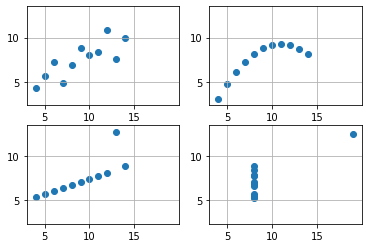

In [89]:
#Primero graficamos los datos de cada uno para observar su comporatmiento. 
#Usamos el grid para tener las gráficas más presentables.
ax1 = subplot(2, 2, 1)
scatter(x,y1)
plt.grid()
subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(x,y2)
plt.grid()
subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(x,y3)
plt.grid()
subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(x4,y4)
plt.grid()

La recta de la regresión lineal la podemos sacar de 3 formas: 
1) Haciendo el modelo de cada uno como el inciso anterior 
2) Con los datos que tiene el link de la página 
3) Con la libería de linear regression

In [91]:
from scipy.stats import linregress

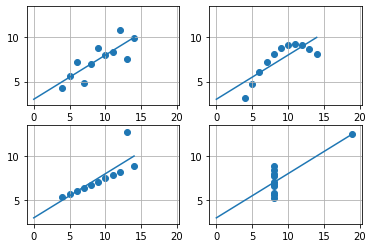

In [101]:
xmax=max(x)
xmax2=max(x4)
ax1 = subplot(2, 2, 1) #Usamos el subplota para que nos muestre todas las gráficas juntas, 
#entonces son 2 filas x 2 columnas y esta es la gráfica 1 
scatter(x,y1) #Queremos que grafique los datos de x,y1 
plt.grid() #Ponemos la cuadrícula para hacerlo más presentable
pendinte, b , r, p, desv = linregress(x, y1) #Sacamos la regresión lienal con la librería
plot([0, xmax], [b, pendinte * xmax + b]) #Graficamos la recta
subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(x,y2) #Queremos que grafique los datos de x,y2
plt.grid()
pendinte, b , r, p, desv = linregress(x, y2) #Queremos que grafique los datos de x,y2
plot([0, xmax], [b, pendinte * xmax + b])
subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(x,y3)
plt.grid()
pendinte, b , r, p, desv = linregress(x, y3) #Queremos que grafique los datos de x,y3
plot([0, xmax], [b, pendinte * xmax + b])
subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(x4,y4)
plt.grid()
pendinte, b , r, p, desv = linregress(x4, y4) #Queremos que grafique los datos de x4,y4
plot([0, xmax2], [b, pendinte * xmax2 + b])

Podemos observar que el modelo para cada una de los modelos no es el mejor. En la primera gráfica podemos ver que la recta sí se ajusta bastante a los datos. En la segunda gráfica, al ser curva, este modelo no encaja por ser un modelo lineal. La tercera recta tiene un problema por el dato atípico que está alrededor de (12,15), es por ello que la recta está muy inclinada y no pasa sobre la mayoría de los datos. En la cuarta gráfica está el dato atípico de (20,15) que hace que la recta no pase sobre la mayoría de los datos

## Problema 5

Use el archivo `radioactive_decay.dat`

In [102]:
%cat data/radioactive_decay.txt

UsageError: Line magic function `%cat` not found.


In [105]:
datos=open('radioactive_decay.txt','r') #En este apartado leeremos los datos de un txt
adatos=[]  #Como a mí se me hace más fácil trabajar con listas entonces vamos a extraer los datos a estas listas
bdatos=[]
lineas=datos.readlines() 
for linea in lineas: #Utilizamos el ciclo for para que por cada linea del texto extraiga los valores
    a,b = linea.split() #Separamos las líneas a de la b
    adatos.append(float(a)) #Guardamos los datos x en la lista de los datos a (Tiempo)
    bdatos.append(float(b)) #Guardamos los datos y en la lista de los datos b (N)
datos.close()
print (adatos)
print (bdatos)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
[10.48, 7.54, 5.49, 4.02, 2.74, 2.02, 1.5, 1.09, 0.68, 0.57, 0.37, 0.31, 0.19, 0.15, 0.13, 0.11]


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0.5, 1.0, 'Gráfica de Datos')

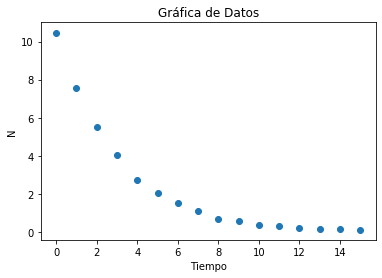

In [107]:
plt.scatter(adatos,bdatos, label="data") 
plt.xlabel('Tiempo')
plt.ylabel('N')
plt.title('Gráfica de Datos')

### Esta gráfica es de la forma 1/x por lo tanto no es lineal, es un modelo hiperbólico con ecuación y=a+b/x

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

### Para linealizar este modelo utilizaremos una transformación tal que: Y=Y & W=1/X. Por lo tanto el modelo queda como Y=a+bW

In [118]:
from math import *

In [156]:
tlista=[]
for i in range(len(adatos)):
    if i!=0:
        t=(1/adatos[i])
        tlista.append(t)
    else:
        tlista.append(adatos[i])
print (tlista)

[0.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667]


In [157]:
transf=open('transform_radioactive_decay.txt', 'w')
for i in range(len(tlista)):
    transf.write(str(tlista[i]) + " " + str(bdatos[i]) + "\n")
transf.close()

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [158]:
datos=open('transform_radioactive_decay.txt','r') #En este apartado leeremos los datos de un txt
mdatos=[]  #Como a mí se me hace más fácil trabajar con listas entonces vamos a extraer los datos a estas listas
ndatos=[]
lineas=datos.readlines() 
for linea in lineas: #Utilizamos el ciclo for para que por cada linea del texto extraiga los valores
    m,n = linea.split() #Separamos las líneas x de la y
    mdatos.append(float(m)) #Guardamos los datos x en la lista de los datos m
    ndatos.append(float(n)) #Guardamos los datos y en la lista de los datos n 
datos.close()
print (mdatos)
print (ndatos)

[0.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667]
[10.48, 7.54, 5.49, 4.02, 2.74, 2.02, 1.5, 1.09, 0.68, 0.57, 0.37, 0.31, 0.19, 0.15, 0.13, 0.11]


Text(0.5, 1.0, 'Gráfica de Datos')

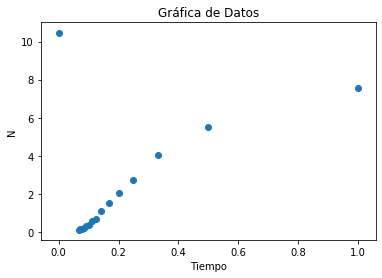

In [159]:
plt.scatter(mdatos,ndatos, label="data") 
plt.xlabel('Tiempo')
plt.ylabel('N')
plt.title('Gráfica de Datos')

### Con este ajuste podemos observar que ya podemos aplicarle un modelo de regresión lineal

In [185]:
M=np.array(mdatos) #Vamos a trabajar con arreglos en la regresión lineal para evitar estar declarando ciclos
N=np.array(ndatos)
P=len(mdatos)
sumM=sum(M)  #Primero sumamos los datos del arreglo de X para obtener el promedio 
sumN=sum(N) #Después sumamos los datos del arreglo de Y para igual sacar su promedio
promM=sumM/P #De aquí en adelante son puras fórmulas
promN=sumN/P 
sM2=sum((M-promM)**2)
sN2=sum((N-promN)**2)
sMN=sum((M-promM)*(N-promN))
pendiente=sMN/sM2 #Para sacar la pendiente beta necesitamos sacar sxy y sx2 (arriba en este código se ve su fórmula)
b1=promN-(pendinte*promM) #Para sacar el factor alpha necesitamos utlizar promy=alpha+beta(promx) y despejamos 

sumM2=sum(M*M)
sumN2=sum(N*N)
sumMN=sum(M*N)
sigmaM=np.sqrt(sumM2/P - promM**2)
sigmaN=np.sqrt(sumN2/P - promN**2)
sigmaMN=sumMN/P - promM*promN
R02=(sigmaMN/(sigmaM*sigmaN))**2 #Sacamos R2 para entender la correlación que existen entrelos datos x & y 
print(pendiente,b1,R02)


6.301794349439414 1.0299502050202185 0.2499956762478437


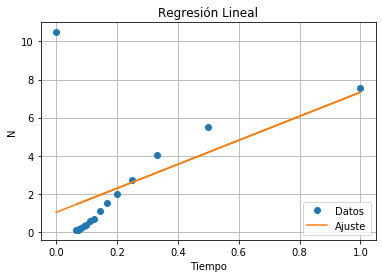

In [186]:
plt.plot(M,N,'o', label='Datos') #Graficamos en plot los datos con forma de puntos
plt.plot(M, pendiente*M + b1, label='Ajuste') #Graficamos ahora la recta por medio de la fórmula y=a+xb
plt.xlabel("Tiempo") 
plt.ylabel("N")
plt.title('Regresión Lineal')
plt.grid() 
plt.legend(loc=4)
plt.show()

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

### Los valores de beta que mejor ajustan al modelo de regresión lineal es con la pendiente= 6.30 y b=1.03 aunque en realidad este modelo no es el mejor para estos datos, dado que aún haciendo la transformación en la gráfica podemos observar que la recta no se ajusta a los datos, tan así que r2 sale muy baja con un 30% de correlación de los datos